In [1]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
from shapely.geometry import Point
import contextily as cx

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [70]:
df_map = df.copy()

df_map['loc'] = df_map[['long','lat']].values.tolist()

geometry = [Point(tuple(xy)) for xy in df_map['loc']]

In [ ]:
geo_df = gpd.GeoDataFrame(df_map, crs="EPSG:4326", geometry=geometry)
df_wm = geo_df.to_crs(epsg=3857)
ax = df_wm.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)

In [35]:
df_map = df_map[(df_map.lat > 47.087) &
        (df_map.lat < 47.779) &
        (df_map.long > -122.527) &
        (df_map.long < -121.064)]

df_map.reset_index(drop=True, inplace=True)

<AxesSubplot: >

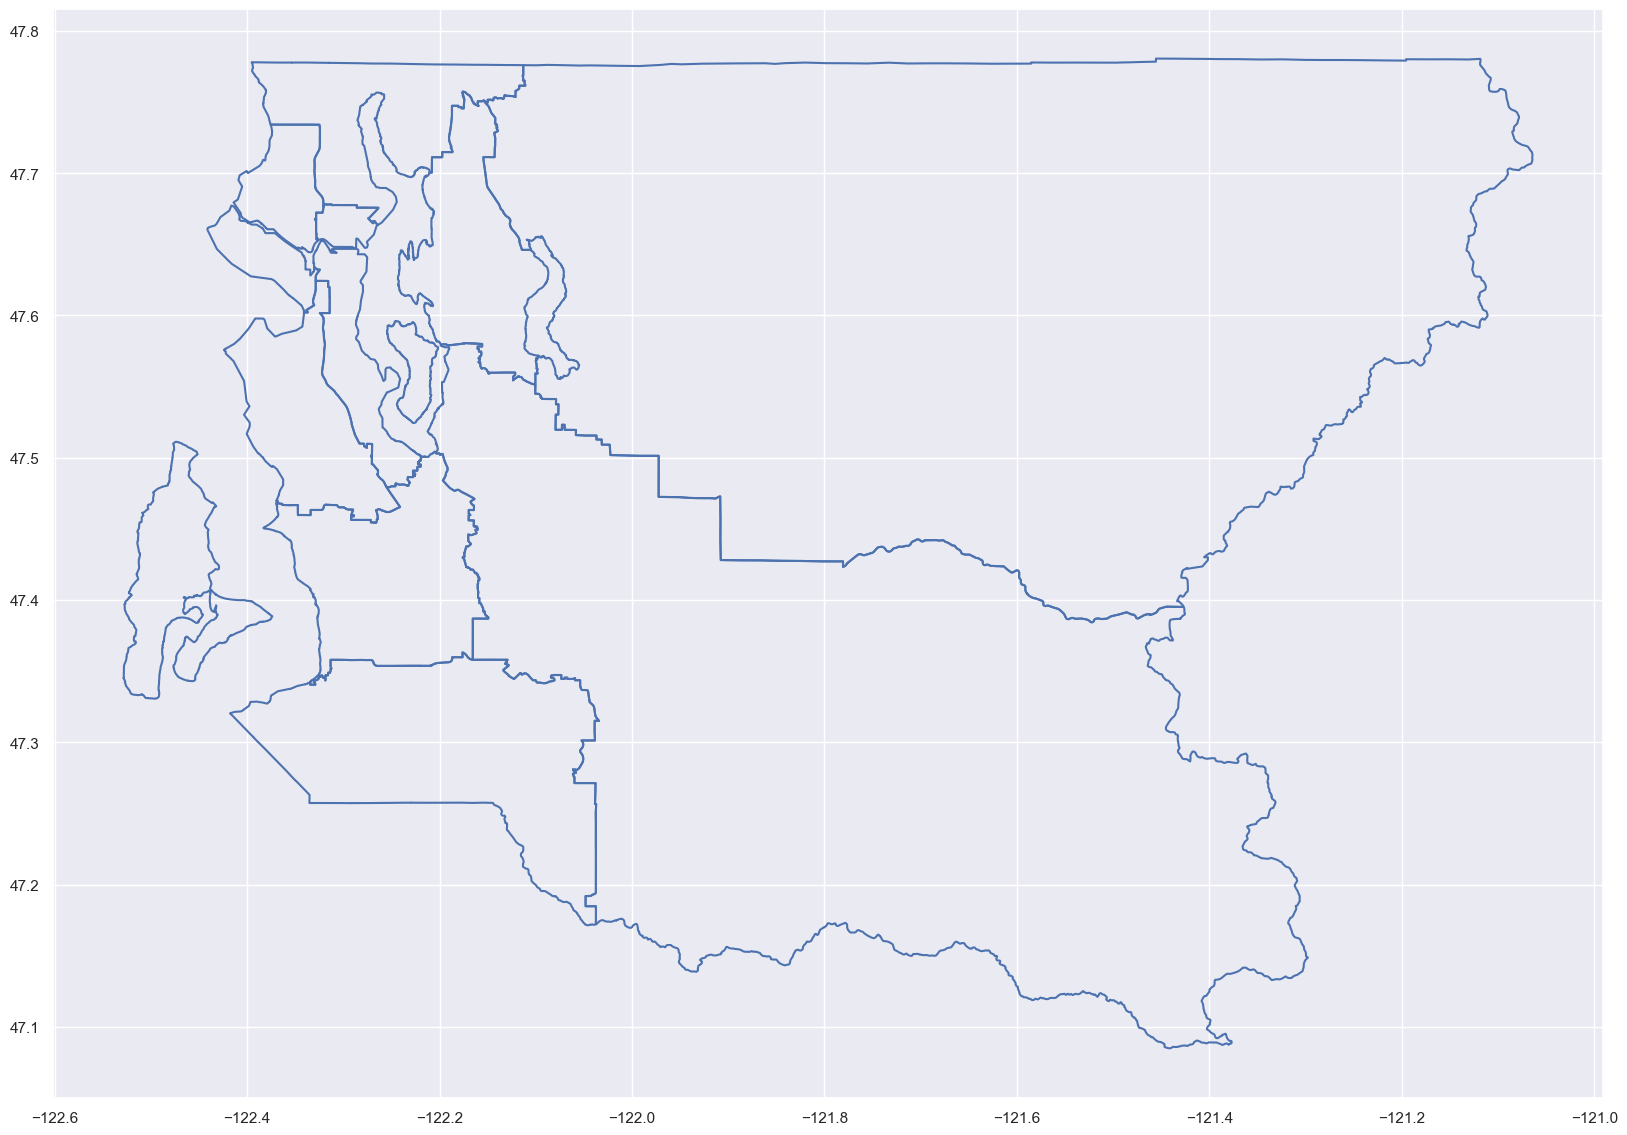

In [51]:
kings_county = gpd.read_file('data/2012_Metropolitan_King_County_Council_Districts___kccdst_area_2012.shp')
kings_county.boundary.plot()

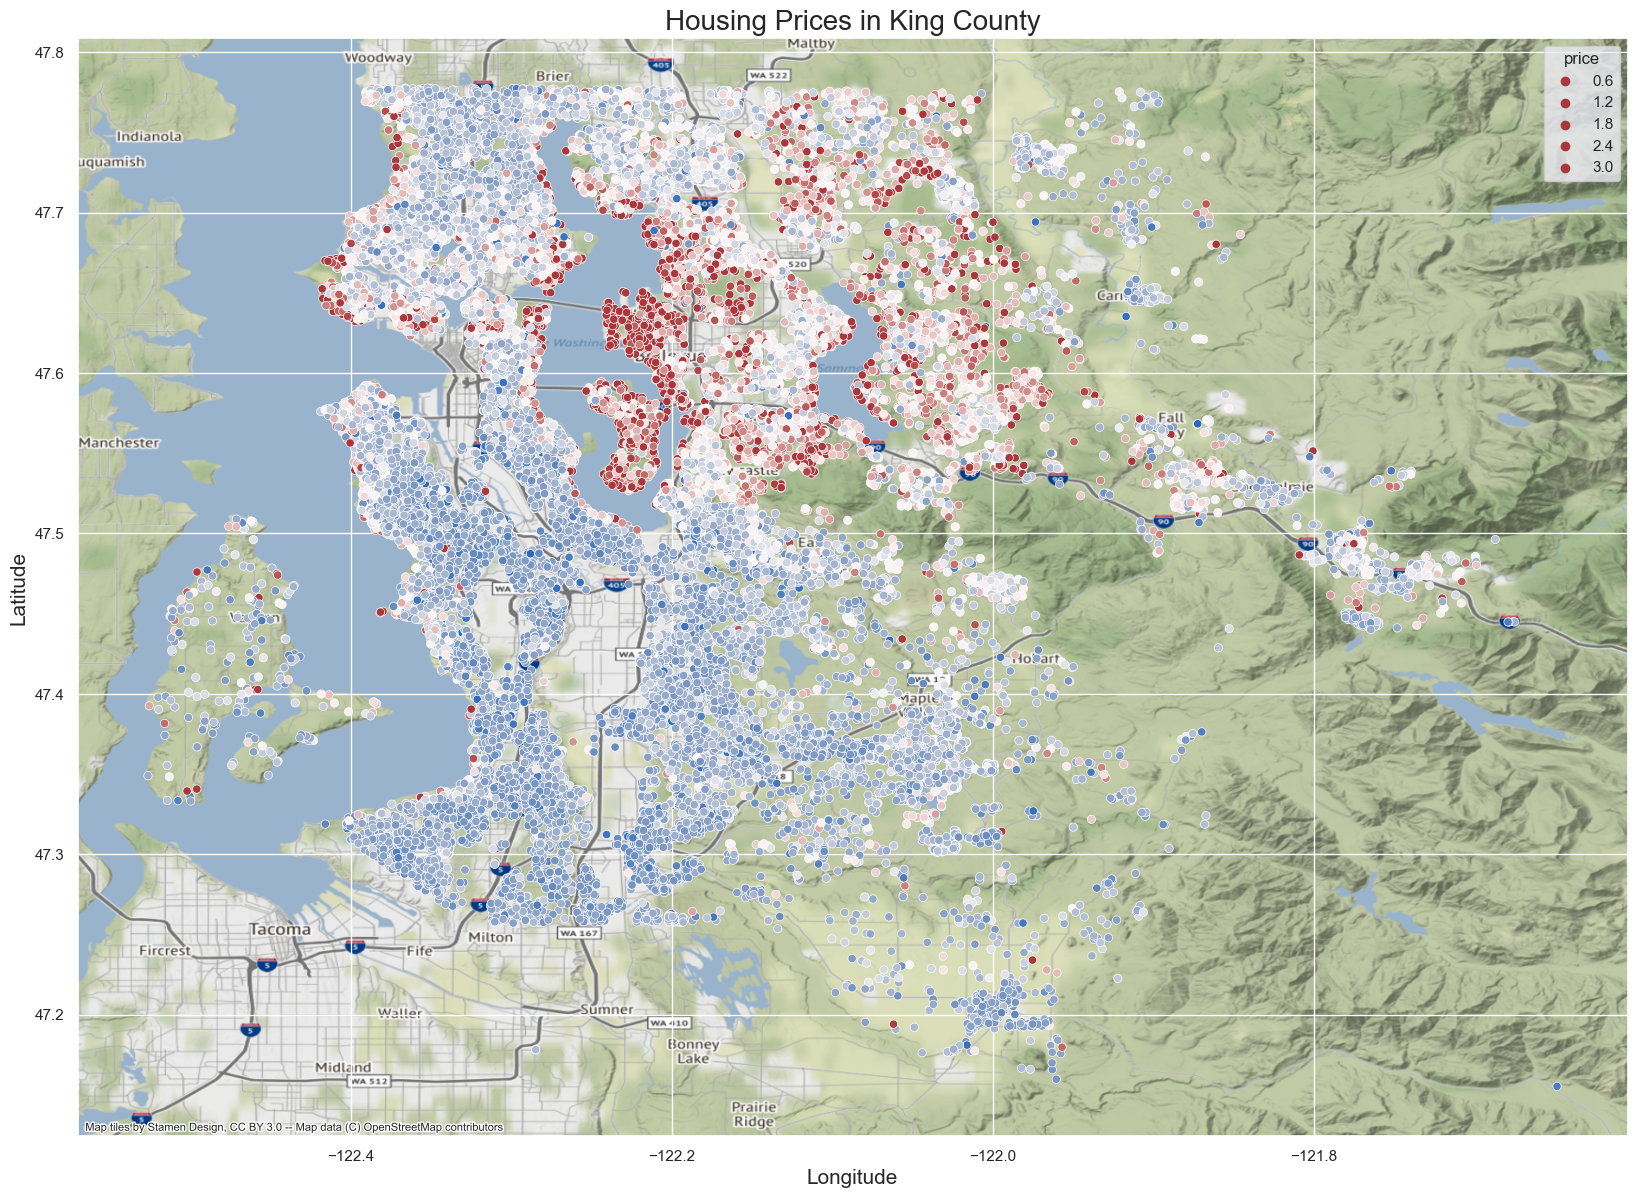

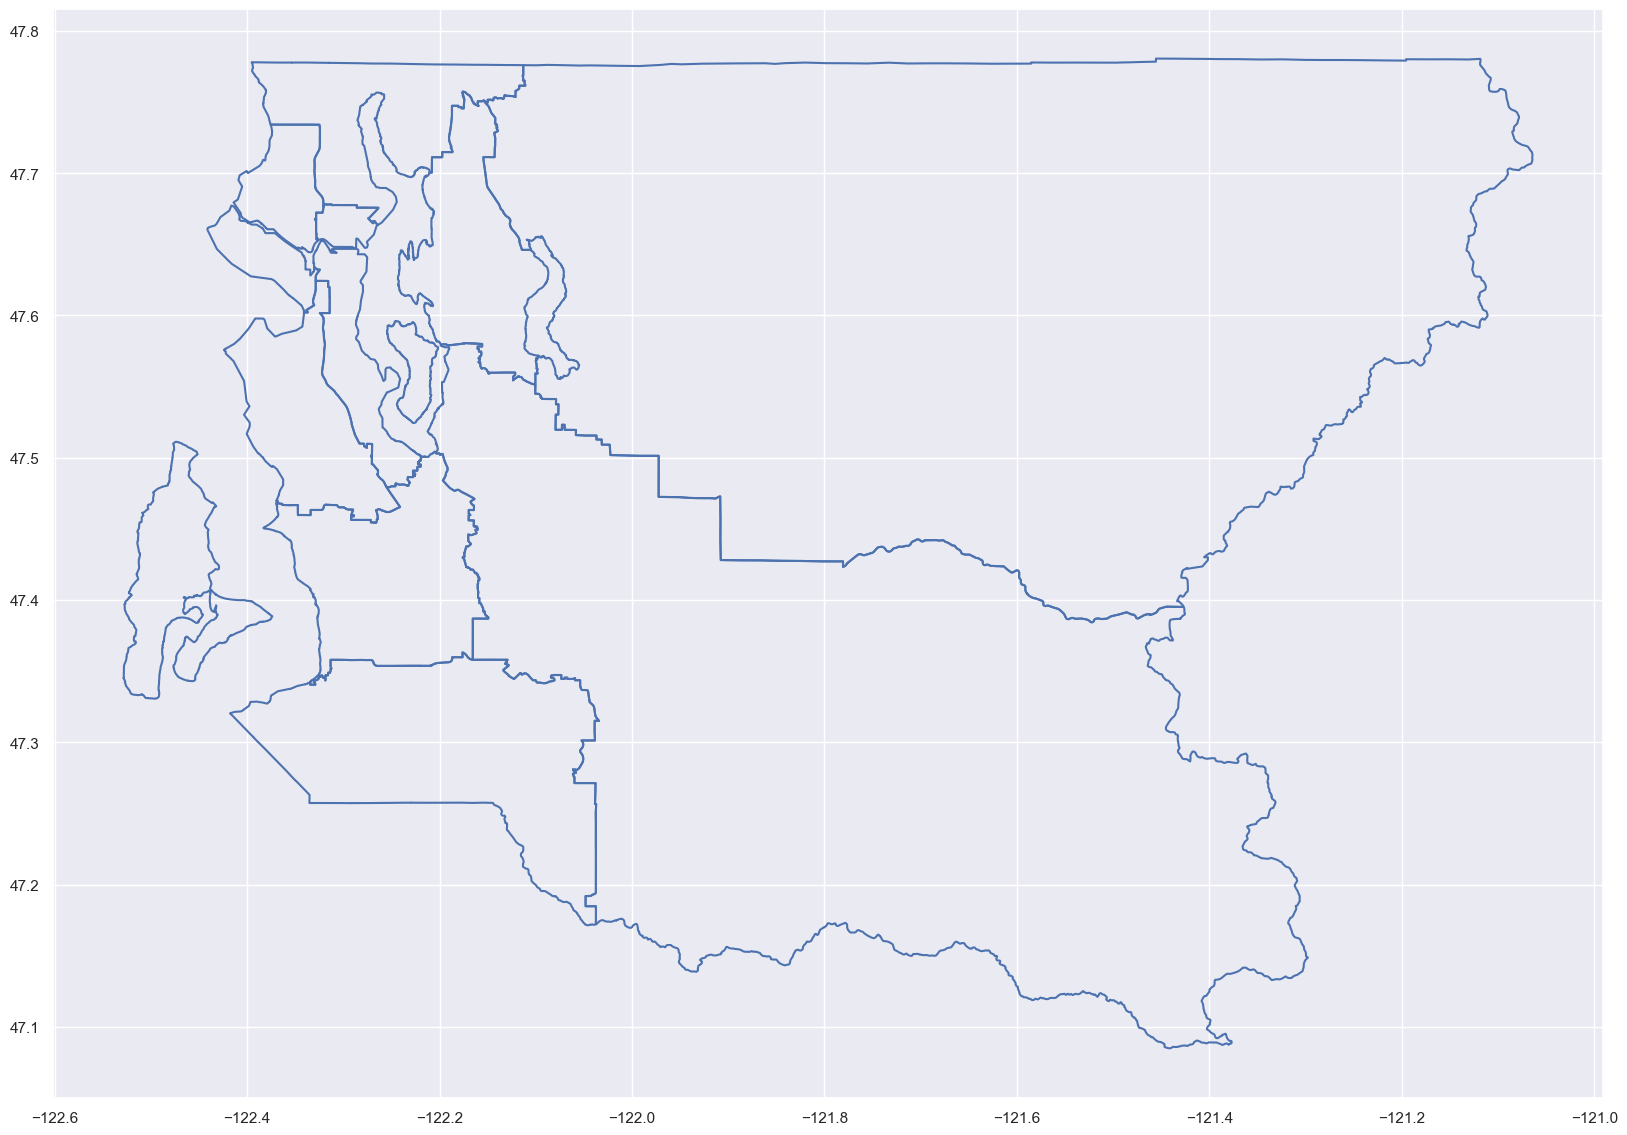

In [68]:
fig = plt.subplots()
sns.set(rc={'figure.figsize':(20,20)})
geometry = [Point(tuple(xy)) for xy in df_map['loc']]
geo_df = gpd.GeoDataFrame(df_map, crs="EPSG:4326", geometry=geometry)
ax = sns.scatterplot(data=geo_df, x='long', y='lat', hue="price", hue_norm=(0, 2750000), palette = 'vlag')
cx.add_basemap(ax, crs=geo_df.crs)
ax.set_xlabel('Longitude', fontdict={'fontsize': 15})
ax.set_ylabel('Latitude', fontdict={'fontsize': 15})
ax.set_title('Housing Prices in King County', fontdict={'fontsize': 20});